In [367]:
import pandas as pd

In [368]:
df = pd.read_csv("bi.csv", encoding="latin1")

In [369]:
df.shape

(77, 11)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [371]:
df.head(5)

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


# uniqueness of categorical variables

In [372]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [373]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [374]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [375]:
df['residence'].unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

## Data Inconsistencies and Cleaning

Some categorical columns had inconsistent values that needed standardization. These were handled by creating mapping dictionaries and replacing values accordingly.

### Country
- `norway`, `Norge`, `Norway` → `Norway`  
- `Rsa`, `South Africa` → `South Africa`  
- `UK`, `United Kingdom` → `United Kingdom`  
- `somali`, `Somalia` → `Somalia`  

### Education
- `Masters`, `master` → `Master`  
- `Bachelors`, `Barrrchelors` → `Bachelor`  
- `Diploma`, `diploma`, `DIPLOMA`, `Diplomaaa` → `Diploma`  
- `HighSchool`, `High School` → `High School`  
- `Doctorate`, `doctorate` → `Doctorate`  

### Gender
- `Female`, `female`, `F` → `Female`  
- `Male`, `male`, `M` → `Male`  

### Residence
- `BI-Residence`, `BIResidence`, `BI_Residence` → `BI Residence`  
- `Sognsvann`, `Private` remain unchanged as they are already consistent  

**Implementation:** Python dictionaries were created for each categorical column, and the `replace()` function was applied to standardize all values, ensuring consistency across the dataset.


# Fixing inconsistent of Country column

In [376]:
df["country"] = df["country"].str.lower().str.strip()

In [377]:
mapping = {
    "norge": "norway",
    "rsa": "south africa",
    "somali": "somalia",
    "uk": "united kingdom"
}
df["country"] = df["country"].replace(mapping)


# Fixing inconsistent of prevEducation column

In [378]:
df["prevEducation"] = df["prevEducation"].str.lower().str.strip()


In [379]:
mapping = {
    "highschool": "high school",
    "high school": "high school",
    "bachelors": "bachelor",
    "barrrchelors": "bachelor",   
    "masters": "master",
    "doctorate": "doctorate",
    "diploma": "diploma",
    "diplomaaa": "diploma"      
}
df["prevEducation"] = df["prevEducation"].replace(mapping)


# Fixing inconsistent of Gender column

In [380]:
df["gender"] = df["gender"].str.lower().str.strip()


In [381]:
gender_map = {
    "f": "female",
    "m": "male"
}
df["gender"] = df["gender"].replace(gender_map)



# fixing inconsistent of residence column

In [382]:
residence = {
    "BI-Residence": "BI Residence",
    "BIResidence": "BI Residence",
    "BI_Residence": "BI Residence"
}
df['residence'] = df['residence'].replace(residence)


In [383]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [384]:
df['prevEducation'].unique()

array(['master', 'diploma', 'high school', 'bachelor', 'doctorate'],
      dtype=object)

In [385]:
df['country'].unique()

array(['norway', 'kenya', 'uganda', 'south africa', 'denmark',
       'netherlands', 'italy', 'spain', 'united kingdom', 'somalia',
       'nigeria', 'germany', 'france'], dtype=object)

### Checking for Duplicates

The dataset was checked for duplicate rows to ensure that no records were repeated, which could bias the analysis.  
After inspection, **no duplicate rows were found**, so no rows were dropped.


In [386]:
df.duplicated().sum()

np.int64(0)

In [387]:
df.drop_duplicates(inplace=True)

# idenifying missing values

In [388]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

### Comparing Imputation Methods for Numerical Columns

To handle missing values in numerical columns (`Python`, `DB`, `studyHOURS`, `Age`, `entryEXAM`), both **mean** and **median** imputation were applied.  

- **Mean imputation** replaces missing values with the average of the column.  
- **Median imputation** replaces missing values with the middle value of the column.

Descriptive statistics were computed for each method and compared with the original data.  
Since the descriptive statistics (`count`, `mean`, `std`, `min`, `max`, percentiles) remained the same for both methods, **either method could be used without affecting the overall distribution**.


In [389]:
l = ["DB", "Python", "studyHOURS","Age","entryEXAM"]
for i in l:
    df_mean = df.copy()
    df_mean[i] = df_mean[i].fillna(df_mean[i].mean())
    
    df_median = df.copy()
    df_median[i] = df_median[i].fillna(df_median[i].median())
    print(f"descriptive stats of {i}")
    print("original\n", df[i].describe())
    print("Mean used:\n", df_mean[i].describe())
    print("Median used:\n", df_median[i].describe())
    print("\n\n")


descriptive stats of DB
original
 count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64
Mean used:
 count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64
Median used:
 count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64



descriptive stats of Python
original
 count    75.000000
mean     75.853333
std      15.410328
min      15.000000
25%      71.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64
Mean used:
 count    77.000000
mean     75.853333
std      15.206208
min      15.000000
25%      72.000000
50%      81.000000
75%      85.000000
max      91.000000

# found no difference between mean or median

In [390]:
for i in l:
    df[i] = df[i].fillna(df[i].mean())

# Imputing Categorical variables

In [391]:
l = ["country", "gender","residence","prevEducation","gender"]
for i in l:
    df[i] = df[i].fillna(df[i].mode()[0])

### Handling Outliers in the Dataset

Initially, the **IQR (Interquartile Range) method** was considered to detect and remove outliers in numerical columns such as `Python`, `DB`, `studyHOURS`, `Age`, and `entryEXAM`. The IQR method calculates a lower bound `(Q1 - 1.5*IQR)` and an upper bound `(Q3 + 1.5*IQR)` for each column and removes values outside this range.

However, when applied, the calculated IQR bounds for some columns were not realistic:

- `studyHOURS`: lower = 123, upper = 179  
- `Python`: lower = 52.5, upper = 104.5  
- `DB`: lower = 15.5, upper = 123.5  

These ranges did not make sense because:  
1. `studyHOURS` should represent hours per week, so realistic values are far below 123–179.  
2. Exam scores (`Python`, `DB`, `entryEXAM`) should be capped at 0–100.  
3. `Age` should realistically be within adult ranges (e.g., 20–80).  

Because the IQR bounds were influenced by incorrect or extreme values in the dataset, using them would either fail to remove actual outliers or remove valid data.

#### Alternative Approach

- For `studyHOURS`, the values appeared to be recorded in incorrect units (10× too large). We corrected this by dividing the values by 10 to bring them into a reasonable weekly range.  
- For exam scores (`Python`, `DB`, `entryEXAM`), we applied manual caps of 0–100 to reflect realistic grading scales.  
- For `Age`, we restricted the range to 20–80, which corresponds to the expected adult population.  

This approach ensures that the dataset reflects realistic, meaningful values and prevents the IQR method from being distorted by extreme or incorrect entries.


# Showing and dealing with outliers

In [392]:
import seaborn as sns 
import matplotlib.pyplot as plt


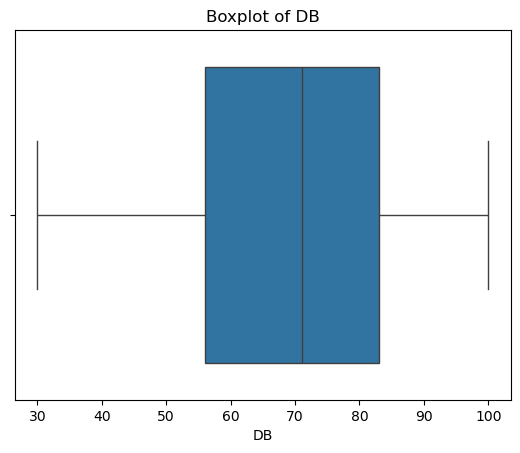

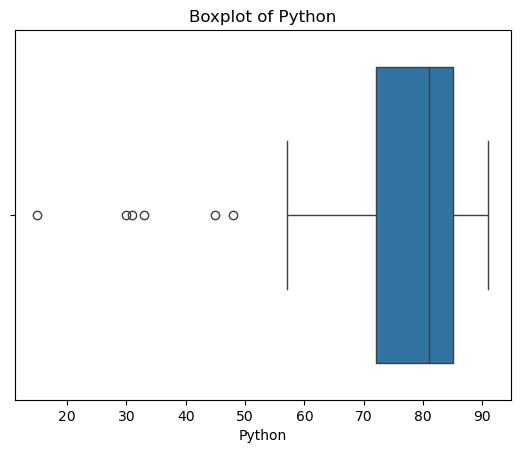

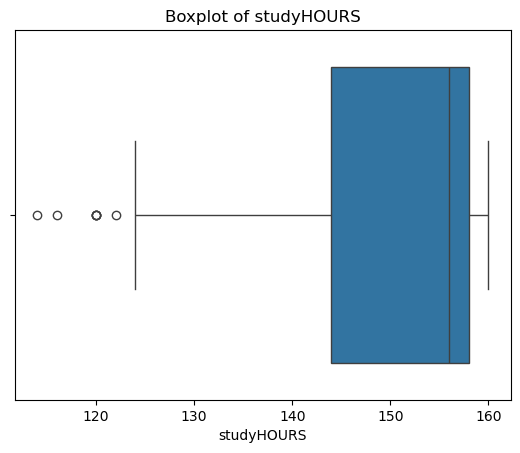

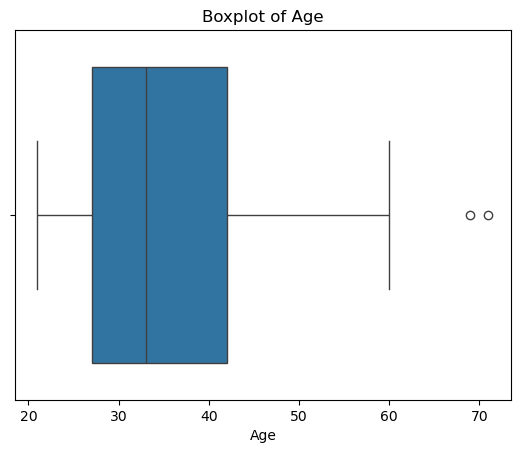

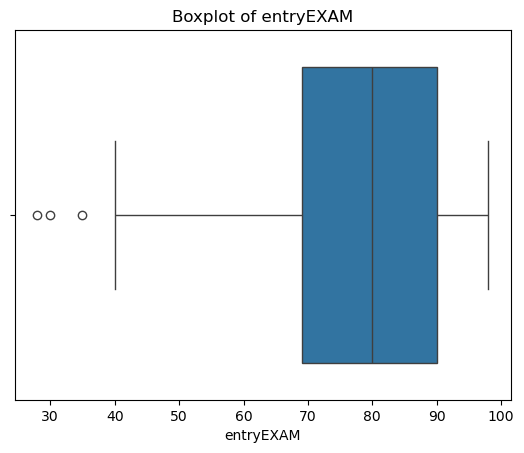

In [393]:
l = ["DB", "Python", "studyHOURS","Age","entryEXAM"]
for i in l:
    sns.boxplot(x=i, data=df)
    plt.title(f"Boxplot of {i}")
    plt.show()


# using iqr it gives unresonable results

In [394]:
l = ["DB", "Python", "studyHOURS","Age","entryEXAM"]

for col in l:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5*IQR
    upper=Q3 + 1.5*IQR
    print(f"for column {col} : lower {lower} , upper {upper}")
    d = df[(df[col] >= lower) & (df[col] <= upper)]
#results suggests a range that is not right

for column DB : lower 15.5 , upper 123.5
for column Python : lower 52.5 , upper 104.5
for column studyHOURS : lower 123.0 , upper 179.0
for column Age : lower 4.5 , upper 64.5
for column entryEXAM : lower 37.5 , upper 121.5


# simple way range and right way

In [395]:
#this hours are per week these are right way as it is more resonable than iqr
df["studyHOURS"]=df["studyHOURS"]/10 # divided to be reasonable
df = df[(df['studyHOURS'] >= 0) & (df['studyHOURS'] <= 100)] # from 120 to 160 hrs per month
df = df[(df['Age'] >= 20) & (df['Age'] <= 80)]
df = df[(df['entryEXAM'] >= 0) & (df['entryEXAM'] <= 100)]
df = df[(df["Python"] >= 0) & (df["Python"] <= 100)]
df = df[(df["DB"] >= 0) & (df["DB"] <= 100)]

# making python column an int 

In [396]:
df["Python"]=df["Python"].astype(int)
df["studyHOURS"]=df["studyHOURS"].astype(int)

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fNAME          77 non-null     object
 1   lNAME          77 non-null     object
 2   Age            77 non-null     int64 
 3   gender         77 non-null     object
 4   country        77 non-null     object
 5   residence      77 non-null     object
 6   entryEXAM      77 non-null     int64 
 7   prevEducation  77 non-null     object
 8   studyHOURS     77 non-null     int64 
 9   Python         77 non-null     int64 
 10  DB             77 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 6.7+ KB


In [398]:
df.to_csv("Cleaned_data.csv",index=False)